<a href="https://colab.research.google.com/github/yehfanju/hello-world/blob/master/ND_Bert_DL_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 基本深度學習模型

In [ ]:
import numpy as np      # 資料前處理用
import torch            # pyTorch 主要module
import torch.nn as nn   # 所有和類神經網絡結構有關的modules
import matplotlib.pyplot as plt                       # 畫圖用
from sklearn.datasets import make_blobs, make_moons   # 產生測試資料用

## 線性二元分類

### 產生測試資料

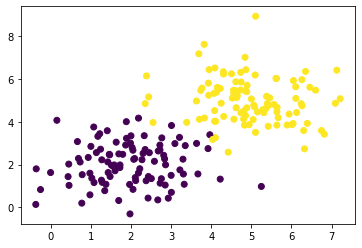

In [ ]:
X1, y1 = make_blobs(n_samples=[100,100], centers=[[2,2], [5,5]], random_state=12345)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)

### 訓練模型

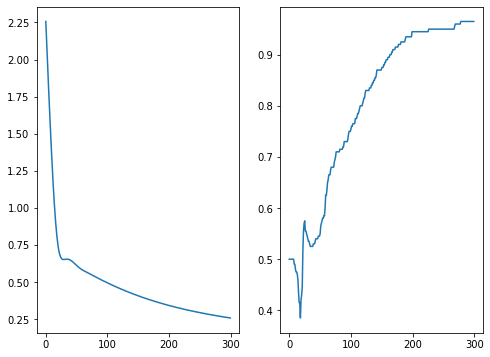

In [ ]:
tensorX1 = torch.tensor(X1, dtype=torch.float)
tensorY1 = torch.tensor(y1, dtype=torch.float)

torch.manual_seed(1234)
model = nn.Linear(2, 1)
loss_fn = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-2)
acc_vec = []
loss_vec = []
for _ in range(300):
  optimizer.zero_grad()
  out = model(tensorX1).squeeze()
  preds = torch.sigmoid(out)
  loss = loss_fn(preds, tensorY1)
  loss.backward()
  optimizer.step()
  acc = np.mean((preds>0.5).long().numpy() ==  y1)
  loss_vec.append(loss.item())
  acc_vec.append(acc)  

_, axes = plt.subplots(1, 2, facecolor="white", figsize=(8,6))
axes[0].plot(loss_vec)
axes[1].plot(acc_vec)

### 檢視模型分類邊界 (decision boundary)

In [ ]:
def visualize_boundary(X, y, model):
  x1min, x2min = np.min(X, axis=0) - 0.2
  x1max, x2max = np.max(X, axis=0) + 0.2
  xx, yy = np.meshgrid(np.arange(x1min, x1max, 0.05), np.arange(x2min, x2max, 0.05))
  newX = np.hstack([
        xx.flatten().reshape(xx.size, 1),
        yy.flatten().reshape(yy.size, 1)])
  new_out = model(torch.tensor(newX, dtype=torch.float))
  new_act = (torch.sigmoid(new_out).detach().numpy() > 0.5).astype(np.int)
  zz = new_act.reshape(xx.shape)    
  plt.contourf(xx, yy, zz, cmap="coolwarm")
  plt.scatter(X[:, 0], X[:, 1], c=y)    

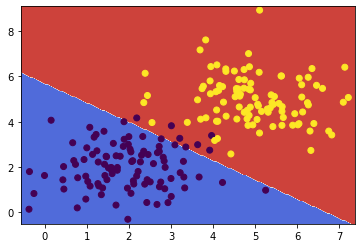

In [ ]:
visualize_boundary(X1, y1, model)

## 非線性分類器

### 產生測試資料

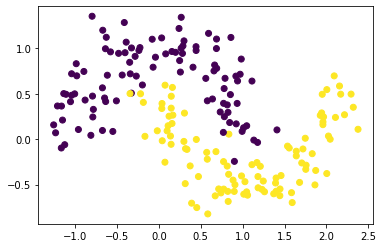

In [ ]:
np.random.seed(12345)
X2, y2 = make_moons(200, noise=0.2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

### 訓練模型

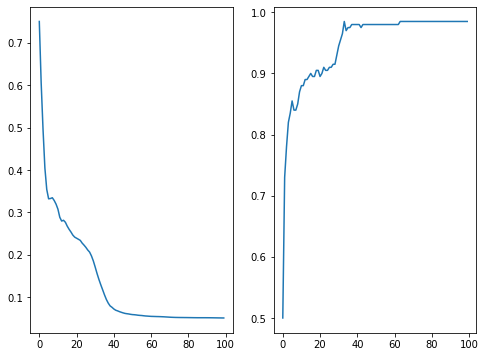

In [ ]:
tensorX2 = torch.tensor(X2, dtype=torch.float)
tensorY2 = torch.tensor(y2, dtype=torch.float)

torch.manual_seed(1234)
model2 = nn.Sequential(
          nn.Linear(2, 4), nn.Tanh(), 
          nn.Linear(4, 1))

loss_fn = nn.BCELoss()
optimizer2 = torch.optim.AdamW(model2.parameters(), lr=5e-1)
acc_vec = []
loss_vec = []

for _ in range(100):
  optimizer2.zero_grad()
  out = model2(tensorX2).squeeze()
  preds = torch.sigmoid(out)
  loss = loss_fn(preds, tensorY2)
  loss.backward()
  optimizer2.step()
  acc = np.mean((preds>0.5).long().numpy() ==  y2)
  loss_vec.append(loss.item())
  acc_vec.append(acc)  

_, axes = plt.subplots(1, 2, facecolor="white", figsize=(8,6))
axes[0].plot(loss_vec)
axes[1].plot(acc_vec)

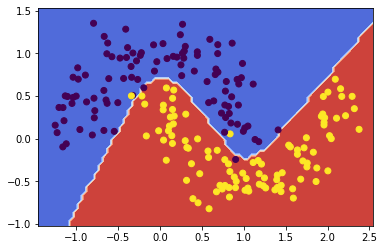

In [ ]:
visualize_boundary(X2, y2, model2)